<a href="https://colab.research.google.com/github/HongyuGu/2021/blob/master/genderize%26sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Genderize Analysis

## Introduction

Now we've get the data we need. Here we'll find out the gender's effect on quotations. Firstly we'll extact the data of male and female respectively. Then we'll sample the quotation, 10000 quotations each time, to detect how many female and male mentioned anxious word in their quotations. As sentiment analysis, the polarity of a quotation is also considered.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pip install gender-guesser #install gender-guesser to split female and male speakers

     |████████████████████████████████| 379 kB 8.4 MB/s 


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy, nltk, sklearn
import numpy as np
from nltk import wordpunct_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
from textblob import TextBlob
import dateutil.parser
import gender_guesser.detector as gender
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Analysis for each year

In [24]:
selected_columns= pd.read_csv("/content/drive/MyDrive/Colab_bbear/gender_data/selected_columns_2019.csv")

In [134]:

# The result of gender guesser will be one of 'unknown' (name not found), 'andy' (androgynous), 'male', 'female', 'mostly_male', or 'mostly_female'.
# here we regard 'female' and 'mostly female' as female speaker
# extract the female and male data respectively


female_columns=selected_columns[(selected_columns.gender=='female')| (selected_columns.gender=='mostly_female')]

male_columns=selected_columns[(selected_columns.gender=='male')| (selected_columns.gender=='mostly_male')]


 

In [135]:
#count the number of female quotations with anxious words
#to make sure our method more scientific and rational, we sampled the data 30 times, with 10,000 samples each time
lst1= np.zeros(30)
for i in range(0,30):
  female_sample= female_columns.sample(10000, random_state= i)
  female_sample.reset_index(inplace= True)
  counter= 0
  for j in range (len(female_sample.speaker)):
    if female_sample.anxiety_feature[j]== 1:
      counter+= 1
  lst1[i]= counter    # 30 numbers of female quotations with anxious words


In [136]:
#count the number of male quotations with anxious words
lst2= np.zeros(30)
for i in range(0,30):
  male_sample= male_columns.sample(10000, random_state= i )
  male_sample.reset_index(inplace= True)
  counter= 0
  for j in range (len(male_sample.speaker)):
    if male_sample.anxiety_feature[j]== 1:
      counter+= 1
  lst2[i]= counter    # 30 numbers of male quotations with anxious words
      


In [137]:
#merge the data into a dataframe
data = pd.DataFrame(data=(lst1, lst2))

([<matplotlib.axis.XTick at 0x7fad6ee7d850>,
 [Text(0, 0, 'female'), Text(0, 0, 'male')])

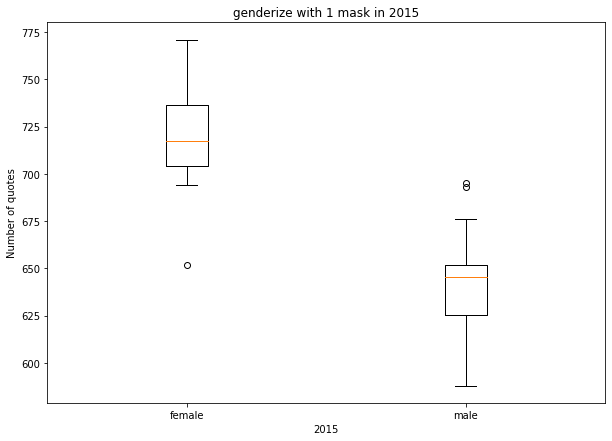

In [138]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.xlabel("2015")
plt.ylabel("Number of quotes")
plt.title('genderize with 1 mask in 2015')
plt.boxplot(data)
plt.xticks([1, 2], ['female', 'male'])
# show plot

#plt.savefig('genderize with 1 mask in 2015')

In [139]:
#extract females' quotations with 2 masks
#mask1: anxious words
#mask2: polarity<= 0, which means the quotation is negtive. to delete some illogical quotations we don't want e.g. postive qoutation but with anxious words
lst3= np.zeros(30)
for i in range(0,30):
  female_sample= female_columns.sample(10000, random_state= i)
  female_sample.reset_index(inplace= True)
  counter= 0
  for j in range (len(female_sample.speaker)):
    if (female_sample.anxiety_feature[j]== 1)& (female_sample.polarity[j]<= 0):
      counter+= 1
  lst3[i]= counter   # 30 numbers of female quotations with anxious words & negative

In [140]:
#extract males with 2 masks
lst4= np.zeros(30)
for i in range(0,30):
  male_sample= male_columns.sample(10000, random_state= i)
  male_sample.reset_index(inplace= True)
  counter= 0
  for j in range (len(male_sample.speaker)):
    if (male_sample.anxiety_feature[j]== 1)& (male_sample.polarity[j]<= 0):
      counter+= 1
  lst4[i]= counter   # 30 numbers of male quotations with anxious words & negative

In [141]:
#merge the data into a dataframe
data2 = pd.DataFrame(data=(lst3, lst4))

In [142]:
data2.to_csv('2019_2masks.csv')

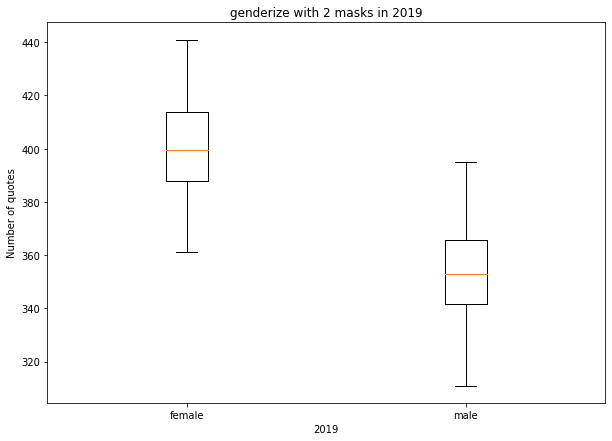

In [143]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.xlabel("2019")
plt.ylabel("Number of quotes")
plt.title('genderize with 2 masks in 2019')
plt.boxplot(data2)
plt.xticks([1, 2], ['female', 'male'])
# show plot

plt.savefig('genderize with 2 masks in 2019')



## Analysis for the four years



In [7]:
#read the data
#mask1: anxious words
#mask2: polarity<= 0
df_2019mask1 = pd.read_csv("/content/drive/MyDrive/Colab_bbear/gender_data/2019_1mask.csv").T
df_2018mask1 = pd.read_csv("/content/drive/MyDrive/Colab_bbear/gender_data/2018_1mask.csv").T
df_2017mask1 = pd.read_csv("/content/drive/MyDrive/Colab_bbear/gender_data/2017_1mask.csv").T
df_2015mask1 = pd.read_csv("/content/drive/MyDrive/Colab_bbear/gender_data/2015_1mask.csv").T
df_2019mask2 = pd.read_csv("/content/drive/MyDrive/Colab_bbear/gender_data/2019_2masks.csv").T
df_2018mask2 = pd.read_csv("/content/drive/MyDrive/Colab_bbear/gender_data/2018_2masks.csv").T
df_2017mask2 = pd.read_csv("/content/drive/MyDrive/Colab_bbear/gender_data/2017_2masks.csv").T
df_2015mask2 = pd.read_csv("/content/drive/MyDrive/Colab_bbear/gender_data/2015_2masks.csv").T

In [8]:
#concatenate data
df1= pd.concat([df_2015mask1, df_2017mask1, df_2018mask1, df_2019mask1], axis= 1)
df2= pd.concat([df_2015mask2, df_2017mask2, df_2018mask2, df_2019mask2], axis= 1)

In [9]:
#optimal the structure of the dataframe
df1.drop(index=['Unnamed: 0'], inplace= True)
df2.drop(index=['Unnamed: 0'], inplace= True)

In [27]:
#rename the columns
df1.columns = ['2015F','2015M','2017F','2017M','2018F','2018M','2019F','2019M']
df2.columns = ['2015F','2015M','2017F','2017M','2018F','2018M','2019F','2019M']

In [34]:
df1

,2015F,2015M,2017F,2017M,2018F,2018M,2019F,2019M
0,648.0,610.0,704.0,624.0,743.0,621.0,716.0,628.0
1,706.0,626.0,710.0,591.0,750.0,613.0,705.0,652.0
2,696.0,624.0,652.0,640.0,708.0,612.0,652.0,646.0
3,692.0,658.0,707.0,627.0,731.0,623.0,746.0,597.0
4,737.0,646.0,736.0,628.0,757.0,579.0,729.0,606.0
5,670.0,589.0,688.0,635.0,718.0,631.0,701.0,614.0
6,703.0,636.0,716.0,652.0,719.0,597.0,694.0,588.0
7,707.0,610.0,681.0,596.0,759.0,619.0,719.0,652.0
8,699.0,620.0,692.0,651.0,720.0,610.0,721.0,676.0
9,728.0,654.0,722.0,622.0,729.0,656.0,745.0,654.0


Text(0.5, 1.0, 'Gender effect on anxious quotation in these four years')

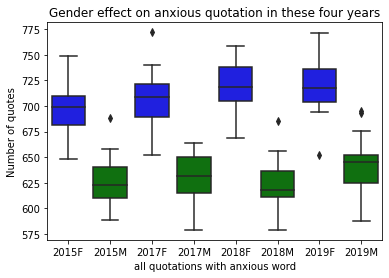

In [39]:
#plot figure using Seaborn
color= {'2015F': 'b','2017F': 'b','2018F': 'b','2019F': 'b', '2015M': 'g','2017M': 'g','2018M': 'g','2019M': 'g'}
sns.boxplot(data=df1, palette=color)

plt.xlabel("all quotations with anxious word")
plt.ylabel("Number of quotes")
plt.title('Gender effect on anxious quotation in these four years')

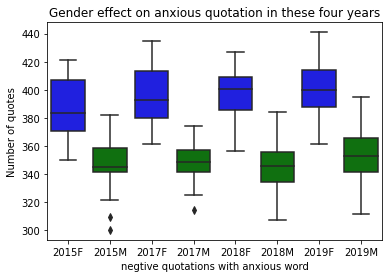

In [40]:
color= {'2015F': 'b','2017F': 'b','2018F': 'b','2019F': 'b', '2015M': 'g','2017M': 'g','2018M': 'g','2019M': 'g'}
sns.boxplot(data=df2, palette=color)
plt.xlabel("negtive quotations with anxious word")
plt.ylabel("Number of quotes")
plt.title('Gender effect on anxious quotation in these four years')
plt.savefig('gender effect')